<a href="https://colab.research.google.com/github/Nelson-Muteti/Group-Project/blob/main/Project_IV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACCIDENTS IN KENYA DATA ANALYSIS**




### **Importing necessary libraries**


In [ ]:
#import necessary libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline 

### **Loading Datasets**

In [ ]:
#Load the 2011 dataset

Accidents_2011= pd.read_csv('2011_Traffic_Incidences_From_Desinventar.csv')

Accidents_2011.head()

,_Serial,Event,Code_County,County,Code_District,District,Code_Division,Division,Date_YMD,Comments,Cause,Description_of_Cause,Source,Magnitude,GLIDEnumber,Other_sectors,DataCards,Deaths,Injured,Missing,Houses_Destroyed,Houses_Damaged,Victims,Affected,Relocated,Evacuated,Losses_$USD,Losses_$Local,Education_centers,Hospitals,Damages_in_crops_Ha,Lost_Cattle,OBJECTID
0,Serial,Event,Code County,County,Code District,District,Code Division,Division,Date (YMD),Comments,Cause,Description of Cause,Source,Magnitude,GLIDEnumber,Other sectors,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Victims,Affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.,Lost Cattle,0
1,11,TRAFFIC ACCIDENT,13,KIAMBU,1301,KIAMBU,130104,LARI,11/09/2011 08:00:00 AM +0000,NaN,Error,Pedestrian crossing road,KPR,NaN,NaN,car damaged,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,29,TRAFFIC ACCIDENT,30,NAIROBI,3001,NAIROBI,300106,MAKADARA,01/01/2011 08:00:00 AM +0000,NaN,NaN,Hit and run,KPR,NaN,NaN,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,35,TRAFFIC ACCIDENT,12,KERICHO,1203,BURET,120303,KONOIN,01/01/2011 08:00:00 AM +0000,NaN,Other cause,Driver lost control of the vehicle.,KPR,NaN,NaN,The motor vehicle front bumper and windscreen ...,1,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,20,TRAFFIC ACCIDENT,23,MAKUENI,2305,MAKUENI,230504,KASIKEU,01/30/2011 08:00:00 AM +0000,NaN,Negligence,Recklessness,NaN,NaN,NaN,Minivan and Leyland lorry damaged,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [ ]:
# Finding general information about the 2011 dataset
Accidents_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   _Serial               1355 non-null   object
 1   Event                 1355 non-null   object
 2   Code_County           1355 non-null   object
 3   County                1355 non-null   object
 4   Code_District         1347 non-null   object
 5   District              1347 non-null   object
 6   Code_Division         1189 non-null   object
 7   Division              1189 non-null   object
 8   Date_YMD              1355 non-null   object
 9   Comments              132 non-null    object
 10  Cause                 1334 non-null   object
 11  Description_of_Cause  1250 non-null   object
 12  Source                1310 non-null   object
 13  Magnitude             1 non-null      object
 14  GLIDEnumber           1 non-null      object
 15  Other_sectors         324 non-null    

In [ ]:
# dataset size

Accidents_2011.shape

(1355, 33)

In [ ]:
# Load the 2017 dataset

xls = pd.ExcelFile('kenya-accidents-database.xlsx')
Accidents_2017 = pd.read_excel(xls, '2017')
Accidents_2016 = pd.read_excel(xls, '2016')

Accidents_2017.head()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,MV INVOLVED,BRIEF ACCIDENT DETAILS,NAME OF VICTIM,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 14
0,745,KISUMU,KISUMU,NAIROBI-BUSIA,KASAGAM FLY OVER,KBS 163T/ZD 9531 AXIOR TRAILER,THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...,UNKNOWN,F,A,29.0,PASSENGER,1.0,2017-11-06,2017-06-11
1,1430,NAROK,NAROK,NAROK-MAU,NAROK TOWN,KBS 518A HONDA CRV,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,80,68.0,PEDESTRIAN,1.0,2017-11-06,NaT
2,1515,LONDIANI,KERICHO,KERICHO-NAKURU,JUBERT AREA,KTCB 472K JOHN DEER,"THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...",UNKNOWN,M,25,26.0,DRIVER,1.0,2017-11-06,NaT
3,1600,KIMILILI,BUNGOMA,BOKOLI-KIMILILI,BITUYU AREA,KBW 374M TOYOTA TOWNACE,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,31,7.0,PEDESTRIAN,1.0,2017-11-06,NaT
4,1747,NAKURU,NAKURU,PIPELINE ELEMENTAITA,PIPELINE AREA,KMDQ 433R DAYAN & KAR 843W,THE VEHICLE HIT THE MOTOR CYCLE,UNKNOWN,M,23,29.0,M/CYCLIST,1.0,2017-11-06,NaT


In [ ]:
# Finding general information about the 2017 dataset
Accidents_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TIME 24 HOURS           737 non-null    object        
 1   BASE/SUB BASE           738 non-null    object        
 2   COUNTY                  739 non-null    object        
 3   ROAD                    737 non-null    object        
 4   PLACE                   734 non-null    object        
 5   MV INVOLVED             740 non-null    object        
 6   BRIEF ACCIDENT DETAILS  740 non-null    object        
 7   NAME OF VICTIM          740 non-null    object        
 8   GENDER                  740 non-null    object        
 9   AGE                     739 non-null    object        
 10  CAUSE CODE              718 non-null    float64       
 11  VICTIM                  740 non-null    object        
 12  NO.                     736 non-null    float64   

In [ ]:
# dataset size

Accidents_2017.shape

(740, 15)

### **DATA CLEANING**


#### *A. 2011 Traffic Accidents*

In [ ]:
# Checking the distinct values of cause to establish whether the column
# is relevant for our study

Accidents_2011['Cause'].unique()

array(['Cause', 'Error', nan, 'Other cause', 'Negligence', 'Fault',
       'Hit and Run', 'Unknown', 'Drowning', 'Rain'], dtype=object)

In [ ]:
# dropping columns irrelevant to the analysis.

Accidents_2011.drop(['_Serial', 'Event', 'Cause', 'Code_County', 'Code_District', 'Code_Division', 'Division', 'Comments', 'Source', 'Losses_$Local', 'OBJECTID', 'Magnitude', 'GLIDEnumber', 'Missing', 'Victims', 'Affected', 'Relocated', 'Evacuated', 'Losses_$USD', 'Education_centers', 'Hospitals', 'Lost_Cattle', 'Damages_in_crops_Ha', 'Houses_Destroyed', 'Houses_Damaged', 'Other_sectors', 'DataCards'], axis=1, inplace= True)

In [ ]:
#drop the first row. since its a repetition of column names

Accidents_2011.drop(Accidents_2011.index[0],inplace=True)

In [ ]:
Accidents_2011.head()

,County,District,Date_YMD,Description_of_Cause,Deaths,Injured
1,KIAMBU,KIAMBU,11/09/2011 08:00:00 AM +0000,Pedestrian crossing road,1,0
2,NAIROBI,NAIROBI,01/01/2011 08:00:00 AM +0000,Hit and run,1,0
3,KERICHO,BURET,01/01/2011 08:00:00 AM +0000,Driver lost control of the vehicle.,0,14
4,MAKUENI,MAKUENI,01/30/2011 08:00:00 AM +0000,Recklessness,0,1
5,LAIKIPIA,LAIKIPIA WEST,01/01/2011 08:00:00 AM +0000,Pedal cyclist was knocked down.,1,0


In [ ]:
#convert some columns to integer datatypes
Accidents_2011['Deaths'] = Accidents_2011['Deaths'].astype(int) 
Accidents_2011['Injured'] = Accidents_2011['Injured'].astype(int)

In [ ]:
# Construct new column to calculate the total number of victims.

Accidents_2011['Tot_Victims']= Accidents_2011['Deaths'] + Accidents_2011['Injured']
Accidents_2011.head()

,County,District,Date_YMD,Description_of_Cause,Deaths,Injured,Tot_Victims
1,KIAMBU,KIAMBU,11/09/2011 08:00:00 AM +0000,Pedestrian crossing road,1,0,1
2,NAIROBI,NAIROBI,01/01/2011 08:00:00 AM +0000,Hit and run,1,0,1
3,KERICHO,BURET,01/01/2011 08:00:00 AM +0000,Driver lost control of the vehicle.,0,14,14
4,MAKUENI,MAKUENI,01/30/2011 08:00:00 AM +0000,Recklessness,0,1,1
5,LAIKIPIA,LAIKIPIA WEST,01/01/2011 08:00:00 AM +0000,Pedal cyclist was knocked down.,1,0,1


In [ ]:
# Checking for null values

Accidents_2011.isnull().sum()

County                    0
District                  8
Date_YMD                  0
Description_of_Cause    105
Deaths                    0
Injured                   0
Tot_Victims               0
dtype: int64

In [ ]:
# Filling null values in District.

Accidents_2011['District'].fillna('Unnamed', inplace= True)

In [ ]:
# Filling null values in Cause Description

Accidents_2011['Description_of_Cause'].fillna('Unspecified', inplace= True)

In [ ]:
# Checking for null values after filling null values
Accidents_2011.isnull().sum()

County                  0
District                0
Date_YMD                0
Description_of_Cause    0
Deaths                  0
Injured                 0
Tot_Victims             0
dtype: int64

In [ ]:
Accidents_2011.shape

(1354, 7)

In [ ]:
# Checking for duplicates

Accidents_2011.duplicated()


1       False
2       False
3       False
4       False
5       False
        ...  
1350    False
1351    False
1352    False
1353    False
1354    False
Length: 1354, dtype: bool

In [ ]:
# Checking the total number of duplicates

Accidents_2011.duplicated().sum()

24

In [ ]:
# Dropping the duplicates

Accidents_2011 = Accidents_2011.drop_duplicates()
Accidents_2011.shape

(1330, 7)

In [ ]:
# create a function that removes white spaces, standardizes the case of string values,
# replaces double spaces with single space, removes periods and replaces '&' with 'and'

def clean_records(x):
  if isinstance(x, str):
    return x.strip().capitalize().replace('  ', ' ').replace('&', 'and').replace('.', '')
  else:
    return x

#apply the function to the dataframe and assign dataframe to new variable
Accidents_2011 = Accidents_2011.applymap(clean_records)

#display a few records to see changes
Accidents_2011

,County,District,Date_YMD,Description_of_Cause,Deaths,Injured,Tot_Victims
1,Kiambu,Kiambu,11/09/2011 08:00:00 am +0000,Pedestrian crossing road,1,0,1
2,Nairobi,Nairobi,01/01/2011 08:00:00 am +0000,Hit and run,1,0,1
3,Kericho,Buret,01/01/2011 08:00:00 am +0000,Driver lost control of the vehicle,0,14,14
4,Makueni,Makueni,01/30/2011 08:00:00 am +0000,Recklessness,0,1,1
5,Laikipia,Laikipia west,01/01/2011 08:00:00 am +0000,Pedal cyclist was knocked down,1,0,1
...,...,...,...,...,...,...,...
1350,Marsabit,Marsabit,12/21/2011 08:00:00 am +0000,M/vehicle lost control,2,8,10
1351,Nyamira,Nyamira,12/21/2011 08:00:00 am +0000,Motor vehicle knocked down a pedestrian,1,0,1
1352,Kisii,Central kisii,12/21/2011 08:00:00 am +0000,Motor vehicle knocked down a pedestrian,1,0,1
1353,Kericho,Buret,12/21/2011 08:00:00 am +0000,Unspecified,1,0,1


In [ ]:
#change date column datatype to a datetime format 
Accidents_2011['Date_YMD'] = pd.to_datetime(Accidents_2011['Date_YMD'])
Accidents_2011 = Accidents_2011.sort_values(by = 'Date_YMD', ascending = True)
Accidents_2011['Date_YMD'] = pd.to_datetime(Accidents_2011.Date_YMD).dt.tz_localize(None)
Accidents_2011.head()

,County,District,Date_YMD,Description_of_Cause,Deaths,Injured,Tot_Victims
2,Nairobi,Nairobi,2011-01-01 08:00:00,Hit and run,1,0,1
3,Kericho,Buret,2011-01-01 08:00:00,Driver lost control of the vehicle,0,14,14
5,Laikipia,Laikipia west,2011-01-01 08:00:00,Pedal cyclist was knocked down,1,0,1
7,Nakuru,Nakuru,2011-01-01 08:00:00,Hit and run by a motor cycle,1,0,1
9,Kitui,Kitui,2011-01-01 08:00:00,Driver lost control of the vehicle,1,0,1


In [ ]:
Accidents_2011.rename(columns={'DATE_YMD' : 'DATE'}, inplace= True)

In [ ]:
#Standardize the column names by removing white spaces using strip()function, lowering the cases using lower() function,
#replacing spaces with underscore and removing brackets using replace() function
Accidents_2011.columns = Accidents_2011.columns.str.strip().str.upper().str.replace(' ', '_')

#display the standardized column names  
Accidents_2011.columns

Index(['COUNTY', 'DISTRICT', 'DATE_YMD', 'DESCRIPTION_OF_CAUSE', 'DEATHS',
       'INJURED', 'TOT_VICTIMS'],
      dtype='object')

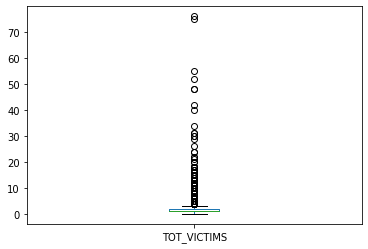

In [ ]:
# Creating a box plot of the total number of victims
Accidents_2011.boxplot(column =['TOT_VICTIMS'], grid = False) 

The outliers in the dataset are integral to the analysis, therefore we will not remove them from the dataset

#### *B. 2017 Traffic Accidents* 

In [ ]:
# Checking for duplicates in MV Involved

Accidents_2017['MV INVOLVED'].duplicated().sum()


79

In [ ]:
# Dropping the duplicate rows

Accidents_2017.drop_duplicates(subset='MV INVOLVED', inplace= True)

In [ ]:
Accidents_2017.shape

(661, 15)

In [ ]:
# Finding duplicates in the whole dataset

Accidents_2017.duplicated().sum()

0

In [ ]:
# Dropping irrelevant columns

Accidents_2017.drop(['MV INVOLVED' , 'Unnamed: 14', 'BASE/SUB BASE', 'VICTIM', 'TIME 24 HOURS', 'PLACE', 'NAME OF VICTIM', 'GENDER', 'AGE', 'CAUSE CODE'], axis=1, inplace= True)

In [ ]:
Accidents_2017

,COUNTY,ROAD,BRIEF ACCIDENT DETAILS,NO.,Date DD/MM/YYYY
0,KISUMU,NAIROBI-BUSIA,THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...,1.0,2017-11-06
1,NAROK,NAROK-MAU,THE VEHICLE KNOCKED DOWN THE VICTIM,1.0,2017-11-06
2,KERICHO,KERICHO-NAKURU,"THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...",1.0,2017-11-06
3,BUNGOMA,BOKOLI-KIMILILI,THE VEHICLE KNOCKED DOWN THE VICTIM,1.0,2017-11-06
4,NAKURU,PIPELINE ELEMENTAITA,THE VEHICLE HIT THE MOTOR CYCLE,1.0,2017-11-06
...,...,...,...,...,...
735,MIGORI,NTIMARU-KEHANCHA,THE VEHICLE KNOCKED DOWN A PEDESTRIAN,1.0,2017-02-22
736,KIRINYAGA,KENOL-MAKUTANO,THE CYCLE HIT THE STATIONARY VEHICLE,2.0,2017-02-22
737,NAIROBI,THIKA RD,THE VEHICLE KNOCKED DOWN A PEDESTIRAN,1.0,2017-02-22
738,MAKUENI,NAIROBI-KANGUNDO,THE VEHICLE COLLIDED HEAD ON WITH THE M/CYCLE,1.0,2017-02-22


In [ ]:
# Finding Null values

Accidents_2017.isnull().sum()

COUNTY                    1
ROAD                      3
BRIEF ACCIDENT DETAILS    0
NO.                       4
Date DD/MM/YYYY           0
dtype: int64

In [ ]:
# Filling null values in Road Column

Accidents_2017['ROAD'].fillna('Unspecified', inplace= True)

In [ ]:
# Filling null values in NO. column

Accidents_2017['NO.'].fillna(0, inplace= True)

In [ ]:
# Filling null values in County column

Accidents_2017['COUNTY'].fillna('Unnamed', inplace= True)

In [ ]:
Accidents_2017.isnull().sum()

COUNTY                    0
ROAD                      0
BRIEF ACCIDENT DETAILS    0
NO.                       0
Date DD/MM/YYYY           0
dtype: int64

In [ ]:
# Convert NO. column to integer datatype

Accidents_2017['NO.'] = Accidents_2017['NO.'].astype(int) 

In [ ]:
Accidents_2017.dtypes

COUNTY                            object
ROAD                              object
BRIEF ACCIDENT DETAILS            object
NO.                                int64
Date DD/MM/YYYY           datetime64[ns]
dtype: object

In [ ]:
# Renaming columns

Accidents_2017.rename(columns={'BRIEF ACCIDENT DETAILS' : 'Description_of_Cause', 'NO.': 'Tot_Victims', 'Date DD/MM/YYYY' : 'Date'}, inplace= True)

In [ ]:
#Standardize the column names by removing white spaces using strip()function, capitalizing the cases using upper() function,
#replacing spaces with underscore and removing brackets using replace() function

Accidents_2017.columns = Accidents_2017.columns.str.strip().str.upper().str.replace(' ', '_')

#display the standardized column names  
Accidents_2017.columns

Index(['COUNTY', 'ROAD', 'DESCRIPTION_OF_CAUSE', 'TOT_VICTIMS', 'DATE'], dtype='object')

In [ ]:
# create a function that removes white spaces, standardizes the case of string values,
# replaces double spaces with single space, removes periods and replaces '&' with 'and'

def clean_records(x):
  if isinstance(x, str):
    return x.strip().capitalize().replace('  ', ' ').replace('&', 'and').replace('.', '').replace(' a ', ' the ')
  else:
    return x

#apply the function to the dataframe and assign dataframe to new variable
Accidents_2017 = Accidents_2017.applymap(clean_records)

#display a few records to see changes
Accidents_2017

,COUNTY,ROAD,DESCRIPTION_OF_CAUSE,TOT_VICTIMS,DATE
0,Kisumu,Nairobi-busia,The vehicle lost control and hit barrier landi...,1,2017-11-06
1,Narok,Narok-mau,The vehicle knocked down the victim,1,2017-11-06
2,Kericho,Kericho-nakuru,"The vehicle lost control,veering off the road ...",1,2017-11-06
3,Bungoma,Bokoli-kimilili,The vehicle knocked down the victim,1,2017-11-06
4,Nakuru,Pipeline elementaita,The vehicle hit the motor cycle,1,2017-11-06
...,...,...,...,...,...
735,Migori,Ntimaru-kehancha,The vehicle knocked down the pedestrian,1,2017-02-22
736,Kirinyaga,Kenol-makutano,The cycle hit the stationary vehicle,2,2017-02-22
737,Nairobi,Thika rd,The vehicle knocked down the pedestiran,1,2017-02-22
738,Makueni,Nairobi-kangundo,The vehicle collided head on with the m/cycle,1,2017-02-22


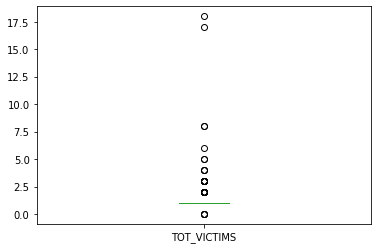

In [ ]:
# Creating a box plot of the total number of victims
Accidents_2017.boxplot(column =['TOT_VICTIMS'], grid = False)

The outliers in the dataset are integral to the analysis, therefore we will not remove them from the dataset

### **DATA ANALYSIS**

#### **Question One**



##### Which Counties had the most number of accidents?

##### *A. 2011 Traffic Accidents*

In [ ]:
# Calculating the number of accidents per county
Accidents_county11 = Accidents_2011.groupby(['COUNTY']).size()

Accidents_county11 = Accidents_county11.to_frame(name = 'COUNT').reset_index()

# Sorting the dataframe in the descending order of 'COUNT'
Accidents_county11 = Accidents_county11.sort_values(by = 'COUNT', ascending = False)

# Calculating the proportion of accidents per county
Accidents_county11['PROPORTION %'] = (Accidents_county11['COUNT'] / Accidents_county11['COUNT'].sum()) * 100
Accidents_county11.head()

,COUNTY,COUNT,PROPORTION %
29,Nairobi,270,20.300752
12,Kiambu,140,10.526316
30,Nakuru,122,9.172932
9,Kakamega,53,3.984962
25,Meru,49,3.684211


##### *B. 2017 Traffic Accidents*

In [ ]:
# Grouping dataset by county and finding the number of accidents in each county
Accidents_county17 = Accidents_2017.groupby(['COUNTY']).size()
Accidents_county17 = Accidents_county17.to_frame(name = 'COUNT').reset_index()

# Sorting the dataframe by descending order of count
Accidents_county17 = Accidents_county17.sort_values(by = 'COUNT', ascending = False)

# Calculating the proportion of accidents per county
Accidents_county17['PROPORTION %'] = (Accidents_county17['COUNT'] / Accidents_county17['COUNT'].sum()) * 100
Accidents_county17.head()

,COUNTY,COUNT,PROPORTION %
33,Nairobi,98,14.826021
14,Kiambu,56,8.472012
34,Nakuru,41,6.202723
23,Machakos,39,5.900151
24,Makueni,29,4.387292


#### **Question Two**  


##### What were the leading causes of accidents on 2011 and 2017 overall?



##### *A. 2011 Traffic Accidents*




In [ ]:
Accidents_causes11 = Accidents_2011.groupby(['DESCRIPTION_OF_CAUSE']).size()
Accidents_causes11 = Accidents_causes11.to_frame(name = 'COUNT').reset_index()
Accidents_causes11 = Accidents_causes11.sort_values(by = 'COUNT', ascending = False)
Accidents_causes11.head(10)

,DESCRIPTION_OF_CAUSE,COUNT
450,Pedestrian knocked down,102
599,Unspecified,102
440,Pedestrian crossing road,84
468,Pedestrian walking along the road,34
236,Lost control,30
479,Pedestrian was knocked down by a car,27
487,Pedestrian was knocked down by a matatu,23
475,Pedestrian was knocked down,18
411,Pedal cyclist knocked down,18
197,Juvenile pedestrian was knocked down,12


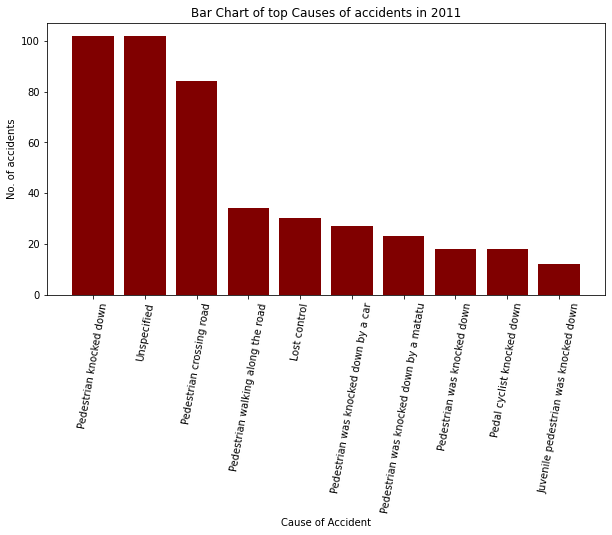

In [ ]:
newdata = Accidents_causes11.head(10)
fig = plt.figure(figsize = (10, 5))
plt.bar(newdata.DESCRIPTION_OF_CAUSE, newdata.COUNT, color ='maroon',  
        width = 0.8)
plt.xlabel("Cause of Accident") 
plt.xticks(rotation=80)
plt.ylabel("No. of accidents") 
plt.title("Bar Chart of top Causes of accidents in 2011") 
plt.show() 

##### *B. 2017 Traffic Accidents*





In [ ]:
Accidents_causes17 = Accidents_2017.groupby(['DESCRIPTION_OF_CAUSE']).size()
Accidents_causes17 = Accidents_causes17.to_frame(name = 'COUNT').reset_index()
Accidents_causes17 = Accidents_causes17.sort_values(by = 'COUNT', ascending = False)
Accidents_causes17.head(10)

,DESCRIPTION_OF_CAUSE,COUNT
255,The vehicle knocked down the victim,169
5,Head on collision,66
254,The vehicle knocked down the pedestrian,11
11,Hit and run,9
280,The vehicle lost control and rolled several times,6
241,The vehicle hit the motor cycle,6
103,The cycle knocked down the victim,5
239,The vehicle hit the m/cycle,5
224,The vehicle collided head on with the m/cycle,5
18,Knocked down the pedestrian,5


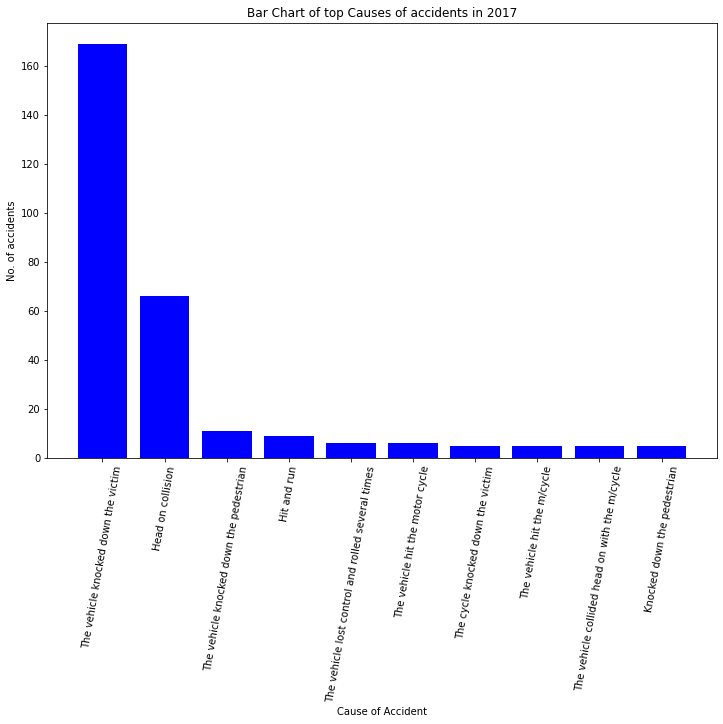

In [ ]:
newdata = Accidents_causes17.head(10)
fig = plt.figure(figsize = (12, 8))
plt.bar(newdata.DESCRIPTION_OF_CAUSE, newdata.COUNT, color ='blue',  
        width = 0.8)
plt.xlabel("Cause of Accident") 
plt.xticks(rotation=80)
plt.ylabel("No. of accidents") 
plt.title("Bar Chart of top Causes of accidents in 2017") 
plt.show() 

#### Question Three  

##### What are the leading causes of accidents in the region with the most number of accidents?




##### *A. 2011 Traffic Accidents*




In [ ]:
#get biggest cause of accidents within Nairobi
#pedestrian related accidents clearly lead
#what can NTSA or County Gov. do?
Nairobi11 = Accidents_2011.loc[Accidents_2011['COUNTY'] =='Nairobi']
County_causes11 = Nairobi11.groupby(['DESCRIPTION_OF_CAUSE']).size()
County_causes11 = County_causes11.to_frame(name = 'COUNT').reset_index()
County_causes11 = County_causes11.sort_values(by = 'COUNT', ascending = False)
County_causes11.head()

,DESCRIPTION_OF_CAUSE,COUNT
93,Pedestrian knocked down,29
90,Pedestrian crossing road,27
144,Unspecified,18
108,Pedestrian was knocked down by a car,10
113,Pedestrian was knocked down by a matatu,8


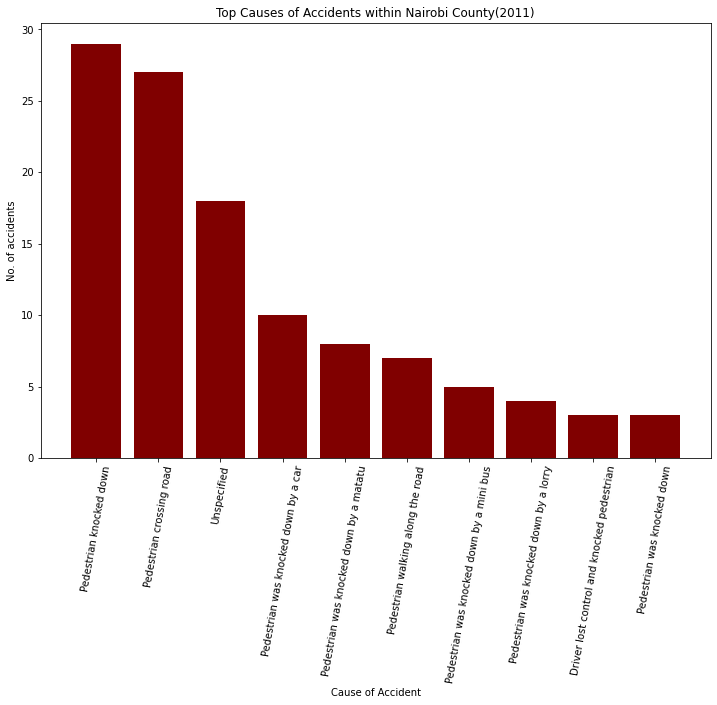

In [ ]:
newdata = County_causes11.head(10)
fig = plt.figure(figsize = (12, 8))
plt.bar(newdata.DESCRIPTION_OF_CAUSE, newdata.COUNT, color ='maroon',  
        width = 0.8)
plt.xlabel("Cause of Accident") 
plt.xticks(rotation=80)
plt.ylabel("No. of accidents") 
plt.title("Top Causes of Accidents within Nairobi County(2011)") 
plt.show() 

##### *B. 2017 Traffic Accidents*

In [ ]:
#get biggest cause of accidents within Nairobi
#pedestrian related accidents clearly lead
#what can NTSA or County Gov. do?
Nairobi17 = Accidents_2017.loc[Accidents_2017['COUNTY'] =='Nairobi']
County_causes17 = Nairobi17.groupby(['DESCRIPTION_OF_CAUSE']).size()
County_causes17 = County_causes17.to_frame(name = 'COUNT').reset_index()
County_causes17 = County_causes17.sort_values(by = 'COUNT', ascending = False)
County_causes17.head(10)

,DESCRIPTION_OF_CAUSE,COUNT
40,The vehicle knocked down the victim,44
39,The vehicle knocked down the pedestrian,3
9,M/v knocked down unknown m/a pedestrian killin...,2
0,Head on collision,2
47,The victim jumped out of the vehicle and was r...,1
46,The victim fell down while the vehicle was in ...,1
28,The prado hit the m/cycle,1
29,The t/wish rammed into the trailler which was ...,1
30,The toyota isis hit the toyota fielder which s...,1
31,The toyota mark ii hit the nissan blue,1


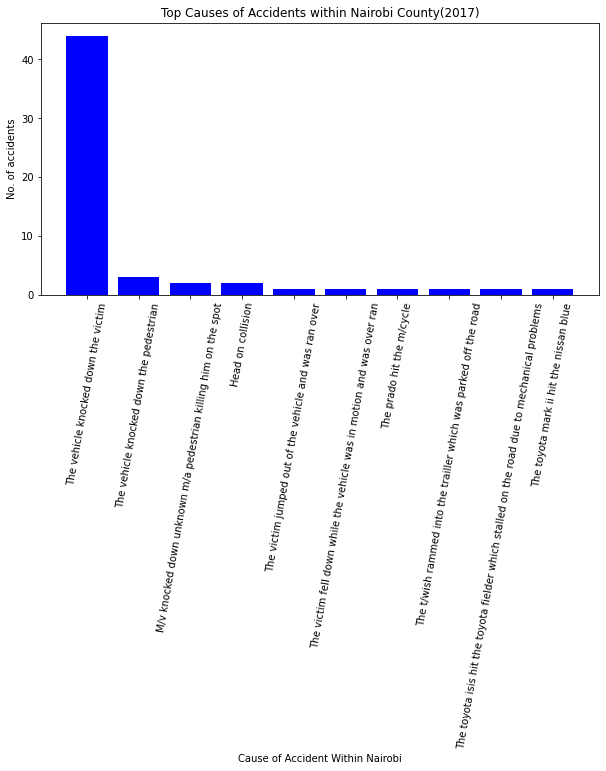

In [ ]:
newdata = County_causes17.head(10)
fig = plt.figure(figsize = (10, 5))
plt.bar(newdata.DESCRIPTION_OF_CAUSE, newdata.COUNT, color ='blue',  
        width = 0.8)
plt.xlabel("Cause of Accident Within Nairobi") 
plt.xticks(rotation=80)
plt.ylabel("No. of accidents") 
plt.title("Top Causes of Accidents within Nairobi County(2017)") 
plt.show() 

#### Question Four  


##### What are the counties with the least numbers of accidents?

##### *A. 2011 Traffic Accidents*

In [ ]:
# Sorting the dataframe in the descending order of 'COUNT'
Accidents_county11 = Accidents_county11.sort_values(by = 'COUNT', ascending = True)
Accidents_county11.head()

,COUNTY,COUNT,PROPORTION %
23,Mandera,1,0.075188
20,Lamu,1,0.075188
36,Samburu,1,0.075188
41,Turkana,2,0.150376
44,Wajir,3,0.225564


##### *B. 2017 Traffic Accidents*

In [ ]:
# Sorting the dataframe in the descending order of 'COUNT'
Accidents_county17 = Accidents_county17.sort_values(by = 'COUNT', ascending = True)
Accidents_county17.head()

,COUNTY,COUNT,PROPORTION %
25,Malindi,1,0.151286
31,Moyale,1,0.151286
26,Mandera,1,0.151286
15,Kilfi,1,0.151286
4,Elgeyo marakwet,1,0.151286


#### Question Five

##### What is the county with the most significant drop of accidents?

In [ ]:
# Rename columns

Accidents_county11.rename(columns={'COUNT': 'COUNT_11', 'PROPORTION %':'PROPORTION_11'}, inplace= True)
Accidents_county17.rename(columns={'COUNT': 'COUNT_17', 'PROPORTION %': 'PROPORTION_17'}, inplace= True)

In [ ]:
# Merging dataframes to compare number of accidents per county in each year

Accidents_merged = pd.merge(left=Accidents_county11, right=Accidents_county17, left_on='COUNTY', right_on='COUNTY')

In [ ]:
Accidents_merged

,COUNTY,COUNT_11,PROPORTION_11,COUNT_17,PROPORTION_17
0,Mandera,1,0.075188,1,0.151286
1,Marsabit,4,0.300752,6,0.907716
2,West pokot,4,0.300752,3,0.453858
3,Isiolo,6,0.451128,2,0.302572
4,Kwale,7,0.526316,6,0.907716
5,Bomet,7,0.526316,8,1.210287
6,Nandi,8,0.601504,7,1.059002
7,Vihiga,10,0.751880,5,0.756430
8,Laikipia,10,0.751880,4,0.605144
9,Busia,11,0.827068,7,1.059002


In [ ]:
# Add difference column.

Accidents_merged['Difference']= Accidents_merged['PROPORTION_11'] - Accidents_merged['PROPORTION_17']
Accidents_merged.sort_values(by= 'Difference', ascending=False)

,COUNTY,COUNT_11,PROPORTION_11,COUNT_17,PROPORTION_17,Difference
37,Nairobi,270,20.300752,98,14.826021,5.474731
35,Nakuru,122,9.172932,41,6.202723,2.970209
36,Kiambu,140,10.526316,56,8.472012,2.054304
28,Kisii,39,2.932331,10,1.512859,1.419472
31,Muranga,44,3.308271,14,2.118003,1.190268
30,Mombasa,41,3.082707,13,1.966717,1.115990
33,Meru,49,3.684211,17,2.571861,1.112350
18,Taita-taveta,17,1.278195,2,0.302572,0.975624
25,Bungoma,30,2.255639,10,1.512859,0.742780
21,Migori,24,1.804511,8,1.210287,0.594224


#### Question Six  

##### What time of the year had the most number of cases?

##### *A. 2011 Traffic Accidents*

In [ ]:
#extract month from datetime format
Accidents_2011['MONTH'] = Accidents_2011['DATE_YMD'].dt.month
Accidents_2011

,COUNTY,DISTRICT,DATE_YMD,DESCRIPTION_OF_CAUSE,DEATHS,INJURED,TOT_VICTIMS,MONTH
2,Nairobi,Nairobi,2011-01-01 08:00:00,Hit and run,1,0,1,1
3,Kericho,Buret,2011-01-01 08:00:00,Driver lost control of the vehicle,0,14,14,1
5,Laikipia,Laikipia west,2011-01-01 08:00:00,Pedal cyclist was knocked down,1,0,1,1
7,Nakuru,Nakuru,2011-01-01 08:00:00,Hit and run by a motor cycle,1,0,1,1
9,Kitui,Kitui,2011-01-01 08:00:00,Driver lost control of the vehicle,1,0,1,1
...,...,...,...,...,...,...,...,...
1353,Kericho,Buret,2011-12-21 08:00:00,Unspecified,1,0,1,12
1347,Nyeri,Nyeri,2011-12-21 08:00:00,M/vehicle knocked down a pedestrian killing him,1,0,1,12
1354,Nakuru,Nakuru,2011-12-21 08:00:00,A lorry driver hit a tree,1,0,1,12
1004,Makueni,Makueni,2011-12-28 08:00:00,A bus veered of the road and landed in a ditch,1,39,40,12


In [ ]:
# Group dataframe by month and count the number of accidents in each month 
Accidents_month11 = Accidents_2011.groupby(['MONTH']).size()
Accidents_month11 = Accidents_month11.to_frame(name = 'COUNT').reset_index()
Accidents_month11 = Accidents_month11.sort_values(by = 'COUNT', ascending = False)
Accidents_month11.head(5)

,MONTH,COUNT
8,9,197
0,1,190
9,10,169
5,6,158
6,7,137


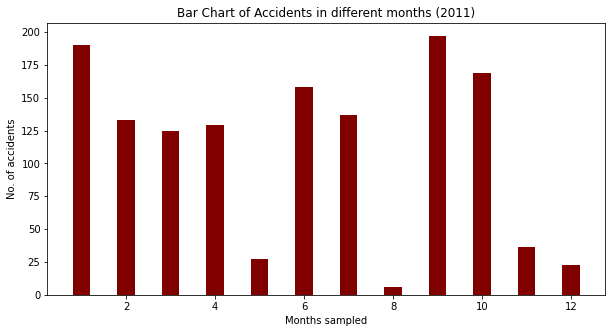

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(Accidents_month11.MONTH, Accidents_month11.COUNT, color ='maroon',  
        width = 0.4)
plt.xlabel("Months sampled") 
plt.ylabel("No. of accidents") 
plt.title("Bar Chart of Accidents in different months (2011)") 
plt.show() 


##### *B. 2017 Traffic Accidents*

In [ ]:
#extract month from datetime format
Accidents_2017['MONTH'] = Accidents_2017['DATE'].dt.month
Accidents_2017

,COUNTY,ROAD,DESCRIPTION_OF_CAUSE,TOT_VICTIMS,DATE,MONTH
0,Kisumu,Nairobi-busia,The vehicle lost control and hit barrier landi...,1,2017-11-06,11
1,Narok,Narok-mau,The vehicle knocked down the victim,1,2017-11-06,11
2,Kericho,Kericho-nakuru,"The vehicle lost control,veering off the road ...",1,2017-11-06,11
3,Bungoma,Bokoli-kimilili,The vehicle knocked down the victim,1,2017-11-06,11
4,Nakuru,Pipeline elementaita,The vehicle hit the motor cycle,1,2017-11-06,11
...,...,...,...,...,...,...
735,Migori,Ntimaru-kehancha,The vehicle knocked down the pedestrian,1,2017-02-22,2
736,Kirinyaga,Kenol-makutano,The cycle hit the stationary vehicle,2,2017-02-22,2
737,Nairobi,Thika rd,The vehicle knocked down the pedestiran,1,2017-02-22,2
738,Makueni,Nairobi-kangundo,The vehicle collided head on with the m/cycle,1,2017-02-22,2


In [ ]:
# Group dataframe by month and count the number of accidents in each month 
Accidents_month17 = Accidents_2017.groupby(['MONTH']).size()
Accidents_month17 = Accidents_month17.to_frame(name = 'COUNT').reset_index()
Accidents_month17 = Accidents_month17.sort_values(by = 'COUNT', ascending = False)
Accidents_month17.head(5)

,MONTH,COUNT
5,7,156
1,3,134
6,8,113
3,5,62
7,9,57


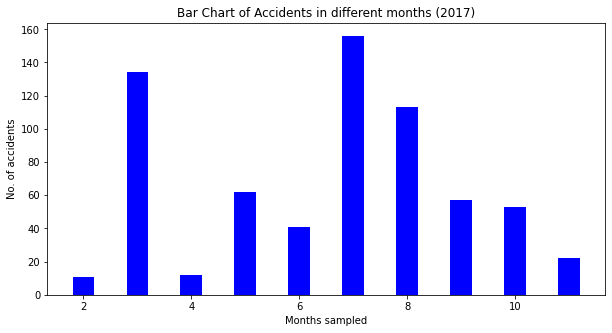

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(Accidents_month17.MONTH, Accidents_month17.COUNT, color ='blue',  
        width = 0.4)
plt.xlabel("Months sampled") 
plt.ylabel("No. of accidents") 
plt.title("Bar Chart of Accidents in different months (2017)") 
plt.show() 

# RECOMENDATIONS


The main recommendations of this data project were as follows: 

Better judgement from motorists and pedestrians especially on the urban roads (Waiyaki way and Mombasa road)

Improved road infrastructure and technology especially on urban coutnies of Nairobi and Kiambu.

Fixing or getting rid of unroadworthy vehicles.

Nairobi County Government needs to put up more traffic lights especially along
Waiyaki way and Mombasa Road.

The NTSA needs to put up more roadblocks and checks along the Mombasa road section in Makueni and Machakos county.

NTSA needs to enforce the Footbridge law and ensure that pedestrians do not cross under the bridge...especially along the Thika Super Highway
